In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import re

In [2]:
#read xls sheet
df=pd.read_excel(open('UEFA Champions League 2016-2022 Data.xlsx', 'rb'),
              sheet_name='matches')  

In [3]:
df

,MATCH_ID,SEASON,DATE_TIME,HOME_TEAM,AWAY_TEAM,STADIUM,HOME_TEAM_SCORE,AWAY_TEAM_SCORE,PENALTY_SHOOT_OUT,ATTENDANCE
0,mt1,2021-2022,15-SEP-21 08.00.00.000000000 PM,Manchester City,RB Leipzig,Etihad Stadium,6,3,0,38062
1,mt2,2021-2022,15-SEP-21 08.00.00.000000000 PM,Club Brugge KV,Paris Saint-Germain,Jan Breydel Stadion,1,1,0,27546
2,mt3,2021-2022,28-SEP-21 08.00.00.000000000 PM,Paris Saint-Germain,Manchester City,Parc des Princes,2,0,0,37350
3,mt4,2021-2022,28-SEP-21 08.00.00.000000000 PM,RB Leipzig,Club Brugge KV,Red Bull Arena,1,2,0,23500
4,mt5,2021-2022,19-OCT-21 05.45.00.000000000 PM,Club Brugge KV,Manchester City,Jan Breydel Stadion,1,5,0,24915
...,...,...,...,...,...,...,...,...,...,...
739,mt740,2016-2017,02-MAY-17 07.45.00.000000000 PM,Real Madrid,Atlético Madrid,Santiago Bernabéu,3,0,0,77609
740,mt741,2016-2017,03-MAY-17 07.45.00.000000000 PM,AS Monaco,Juventus,Stade Louis II,0,2,0,16762
741,mt742,2016-2017,09-MAY-17 07.45.00.000000000 PM,Juventus,AS Monaco,Allianz Stadium,2,1,0,40244
742,mt743,2016-2017,10-MAY-17 07.45.00.000000000 PM,Atlético Madrid,Real Madrid,Vicente Calderón,2,1,0,53422


In [4]:
#mark home win and away win
df['hw']=df.apply(lambda row: 1 if row['HOME_TEAM_SCORE'] > row['AWAY_TEAM_SCORE'] else 0,axis=1)
df['aw']=df.apply(lambda row: 1 if row['HOME_TEAM_SCORE'] < row['AWAY_TEAM_SCORE'] else 0,axis=1)

#all possible loss
#mark home loss and away loss
df['hl']=df.apply(lambda row: 1 if row['HOME_TEAM_SCORE'] < row['AWAY_TEAM_SCORE'] else 0,axis=1)
df['al']=df.apply(lambda row: 1 if row['HOME_TEAM_SCORE'] > row['AWAY_TEAM_SCORE'] else 0,axis=1)





In [5]:
df

,MATCH_ID,SEASON,DATE_TIME,HOME_TEAM,AWAY_TEAM,STADIUM,HOME_TEAM_SCORE,AWAY_TEAM_SCORE,PENALTY_SHOOT_OUT,ATTENDANCE,hw,aw,hl,al
0,mt1,2021-2022,15-SEP-21 08.00.00.000000000 PM,Manchester City,RB Leipzig,Etihad Stadium,6,3,0,38062,1,0,0,1
1,mt2,2021-2022,15-SEP-21 08.00.00.000000000 PM,Club Brugge KV,Paris Saint-Germain,Jan Breydel Stadion,1,1,0,27546,0,0,0,0
2,mt3,2021-2022,28-SEP-21 08.00.00.000000000 PM,Paris Saint-Germain,Manchester City,Parc des Princes,2,0,0,37350,1,0,0,1
3,mt4,2021-2022,28-SEP-21 08.00.00.000000000 PM,RB Leipzig,Club Brugge KV,Red Bull Arena,1,2,0,23500,0,1,1,0
4,mt5,2021-2022,19-OCT-21 05.45.00.000000000 PM,Club Brugge KV,Manchester City,Jan Breydel Stadion,1,5,0,24915,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,mt740,2016-2017,02-MAY-17 07.45.00.000000000 PM,Real Madrid,Atlético Madrid,Santiago Bernabéu,3,0,0,77609,1,0,0,1
740,mt741,2016-2017,03-MAY-17 07.45.00.000000000 PM,AS Monaco,Juventus,Stade Louis II,0,2,0,16762,0,1,1,0
741,mt742,2016-2017,09-MAY-17 07.45.00.000000000 PM,Juventus,AS Monaco,Allianz Stadium,2,1,0,40244,1,0,0,1
742,mt743,2016-2017,10-MAY-17 07.45.00.000000000 PM,Atlético Madrid,Real Madrid,Vicente Calderón,2,1,0,53422,1,0,0,1


In [6]:
#group by season,how many matches played , how many win loss and draws

#total win = home win + away win
#total lose = home lose + away lose

seasonHomeWinLoss=df.groupby(['SEASON','HOME_TEAM']).agg({'hw': ['sum'],'hl': ['sum']})
seasonAwayWinLoss=df.groupby(['SEASON','AWAY_TEAM']).agg({'aw': ['sum'],'al': ['sum']})


In [7]:
seasonHomeWinLoss

hw  hl
                               sum sum
SEASON    HOME_TEAM                   
2016-2017 AS Monaco              4   1
          Arsenal FC             2   1
          Atlético Madrid        5   0
          Bayer Leverkusen       1   1
          Bayern München         4   1
...                             ..  ..
2021-2022 Shakhtar Donetsk       0   1
          Sporting CP            2   2
          VfL Wolfsburg          1   1
          Villarreal CF          2   2
          Zenit St. Petersburg   1   1

[192 rows x 2 columns]

In [8]:
seasonAwayWinLoss

aw  al
                               sum sum
SEASON    AWAY_TEAM                   
2016-2017 AS Monaco              2   3
          Arsenal FC             2   1
          Atlético Madrid        3   2
          Bayer Leverkusen       1   0
          Bayern München         2   3
...                             ..  ..
2021-2022 Shakhtar Donetsk       0   3
          Sporting CP            1   2
          VfL Wolfsburg          0   2
          Villarreal CF          3   2
          Zenit St. Petersburg   0   2

[192 rows x 2 columns]

In [9]:
#win from home and away
s_wins=seasonHomeWinLoss['hw']+seasonAwayWinLoss['aw']

#loss from home and away
s_lose=seasonHomeWinLoss['hl']+seasonAwayWinLoss['al']

In [10]:
s_wins.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 192 entries, ('2016-2017', 'AS Monaco') to ('2021-2022', 'Zenit St. Petersburg')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sum     192 non-null    int64
dtypes: int64(1)
memory usage: 2.6+ KB


In [11]:
s_wins

sum
SEASON    HOME_TEAM                
2016-2017 AS Monaco               6
          Arsenal FC              4
          Atlético Madrid         8
          Bayer Leverkusen        2
          Bayern München          6
...                             ...
2021-2022 Shakhtar Donetsk        0
          Sporting CP             3
          VfL Wolfsburg           1
          Villarreal CF           5
          Zenit St. Petersburg    1

[192 rows x 1 columns]

In [12]:
s_lose

sum
SEASON    HOME_TEAM                
2016-2017 AS Monaco               4
          Arsenal FC              2
          Atlético Madrid         2
          Bayer Leverkusen        1
          Bayern München          4
...                             ...
2021-2022 Shakhtar Donetsk        4
          Sporting CP             4
          VfL Wolfsburg           3
          Villarreal CF           4
          Zenit St. Petersburg    3

[192 rows x 1 columns]

In [13]:
#merge the result side by side using idex
seasonWinLoss=pd.merge(s_wins,s_lose,left_index=True,right_index=True)


seasonWinLoss.columns= ['total_wins', 'total_loss']

seasonWinLoss


total_wins  total_loss
SEASON    HOME_TEAM                                   
2016-2017 AS Monaco                      6           4
          Arsenal FC                     4           2
          Atlético Madrid                8           2
          Bayer Leverkusen               2           1
          Bayern München                 6           4
...                                    ...         ...
2021-2022 Shakhtar Donetsk               0           4
          Sporting CP                    3           4
          VfL Wolfsburg                  1           3
          Villarreal CF                  5           4
          Zenit St. Petersburg           1           3

[192 rows x 2 columns]

In [14]:
seasonWinLoss.loc[['2021-2022']]
# df.loc[['a']]

total_wins  total_loss
SEASON    HOME_TEAM                                   
2021-2022 AC Milan                       1           4
          AFC Ajax                       6           1
          Atalanta                       1           2
          Atlético Madrid                3           4
          BSC Young Boys                 1           3
          Bayern München                 7           1
          Beşiktaş                       0           6
          Borussia Dortmund              3           3
          Chelsea FC                     7           2
          Club Brugge KV                 1           4
          Dinamo Kiev                    0           5
          FC Barcelona                   2           3
          FC Porto                       1           3
          FC Sheriff                     2           3
          Inter                          4           3
          Juventus                       5           2
          Lille OSC                      3           3
          Liverpool FC                  10           2
          Malmö FF                       0           5
          Manchester City                7           3
          Manchester United              3           2
          Paris Saint-Germain            4           2
          RB Leipzig                     2           3
          RB Salzburg                    3           3
          Real Madrid                    9           4
          SL Benfica                     3           3
          Sevilla FC                     1           2
          Shakhtar Donetsk               0           4
          Sporting CP                    3           4
          VfL Wolfsburg                  1           3
          Villarreal CF                  5           4
          Zenit St. Petersburg           1           3

In [15]:
#group by season and , find out how many matches played 

#total matches = home + away matches

seasonHomeMatches=df.groupby(['SEASON','HOME_TEAM']).agg({'MATCH_ID': ['count']})
seasonAwayMatches=df.groupby(['SEASON','AWAY_TEAM']).agg({'MATCH_ID': ['count']})

In [16]:
totalMatches=seasonHomeMatches + seasonAwayMatches

In [17]:
totalMatches.columns=['total_matches']

In [18]:
#merge side by side  

totalMatches=pd.merge(totalMatches,seasonWinLoss,left_index=True,right_index=True)


In [19]:
totalMatches.columns

Index(['total_matches', 'total_wins', 'total_loss'], dtype='object')

In [20]:
#calculate draw column using total - win - loss



totalMatches['total_draws'] = totalMatches['total_matches'] - totalMatches['total_wins'] -totalMatches['total_loss']



In [21]:
totalMatches

total_matches  total_wins  total_loss  \
SEASON    HOME_TEAM                                                     
2016-2017 AS Monaco                        12           6           4   
          Arsenal FC                        8           4           2   
          Atlético Madrid                  12           8           2   
          Bayer Leverkusen                  8           2           1   
          Bayern München                   10           6           4   
...                                       ...         ...         ...   
2021-2022 Shakhtar Donetsk                  6           0           4   
          Sporting CP                       8           3           4   
          VfL Wolfsburg                     6           1           3   
          Villarreal CF                    12           5           4   
          Zenit St. Petersburg              6           1           3   

                                total_draws  
SEASON    HOME_TEAM                          
2016-2017 AS Monaco                       2  
          Arsenal FC                      2  
          Atlético Madrid                 2  
          Bayer Leverkusen                5  
          Bayern München                  0  
...                                     ...  
2021-2022 Shakhtar Donetsk                2  
          Sporting CP                     1  
          VfL Wolfsburg                   2  
          Villarreal CF                   3  
          Zenit St. Petersburg            2  

[192 rows x 4 columns]

In [22]:
# totalMatches.loc[(['2021-2022']),'Liverpool FC',:]

In [23]:
#find total scoreed
#scored = homeScored + awayScored
#group by home and homeScored  + #group by home and awayScored


#concede = homeCoced +awayConcede
#homeConced = group by home but calculare away scored
#awayConced = group by away but calculare home scored


In [24]:
#total scored
seasonHomeScored=df.groupby(['SEASON','HOME_TEAM']).agg({'HOME_TEAM_SCORE': ['sum']})
seasonAwayScored=df.groupby(['SEASON','AWAY_TEAM']).agg({'AWAY_TEAM_SCORE': ['sum']})


In [25]:
#total conced
seasonHomeConcede=df.groupby(['SEASON','HOME_TEAM']).agg({'AWAY_TEAM_SCORE': ['sum']})
seasonAwayConcede=df.groupby(['SEASON','AWAY_TEAM']).agg({'HOME_TEAM_SCORE': ['sum']})




In [26]:
seasonHomeScored

HOME_TEAM_SCORE
                                           sum
SEASON    HOME_TEAM                           
2016-2017 AS Monaco                         12
          Arsenal FC                        11
          Atlético Madrid                    8
          Bayer Leverkusen                   7
          Bayern München                    16
...                                        ...
2021-2022 Shakhtar Donetsk                   1
          Sporting CP                        8
          VfL Wolfsburg                      4
          Villarreal CF                      8
          Zenit St. Petersburg               7

[192 rows x 1 columns]

In [27]:
seasonAwayScored

AWAY_TEAM_SCORE
                                           sum
SEASON    AWAY_TEAM                           
2016-2017 AS Monaco                         10
          Arsenal FC                         9
          Atlético Madrid                    7
          Bayer Leverkusen                   3
          Bayern München                    11
...                                        ...
2021-2022 Shakhtar Donetsk                   1
          Sporting CP                        6
          VfL Wolfsburg                      1
          Villarreal CF                     12
          Zenit St. Petersburg               3

[192 rows x 1 columns]

In [28]:
seasonScored =seasonHomeScored['HOME_TEAM_SCORE'] + seasonAwayScored['AWAY_TEAM_SCORE']

In [29]:
#rename
seasonScored.columns=['scored']
seasonScored

scored
SEASON    HOME_TEAM                   
2016-2017 AS Monaco                 22
          Arsenal FC                20
          Atlético Madrid           15
          Bayer Leverkusen          10
          Bayern München            27
...                                ...
2021-2022 Shakhtar Donetsk           2
          Sporting CP               14
          VfL Wolfsburg              5
          Villarreal CF             20
          Zenit St. Petersburg      10

[192 rows x 1 columns]

In [30]:
seasonAwayConcede

HOME_TEAM_SCORE
                                           sum
SEASON    AWAY_TEAM                           
2016-2017 AS Monaco                         14
          Arsenal FC                         9
          Atlético Madrid                    7
          Bayer Leverkusen                   2
          Bayern München                    10
...                                        ...
2021-2022 Shakhtar Donetsk                   6
          Sporting CP                        6
          VfL Wolfsburg                      5
          Villarreal CF                      8
          Zenit St. Petersburg               6

[192 rows x 1 columns]

In [31]:
seasonConcede=seasonHomeConcede['AWAY_TEAM_SCORE'] + seasonAwayConcede['HOME_TEAM_SCORE']
seasonConcede.columns=['conceded']
seasonConcede

conceded
SEASON    HOME_TEAM                     
2016-2017 AS Monaco                   20
          Arsenal FC                  16
          Atlético Madrid              9
          Bayer Leverkusen             8
          Bayern München              14
...                                  ...
2021-2022 Shakhtar Donetsk            12
          Sporting CP                 17
          VfL Wolfsburg               10
          Villarreal CF               16
          Zenit St. Petersburg        10

[192 rows x 1 columns]

In [32]:
#add the total scored and conded to the dataframe
temp1=pd.merge(totalMatches,seasonScored,left_index=True,right_index=True)
allMatches=pd.merge(temp1,seasonConcede,left_index=True,right_index=True)

In [33]:
allMatches

total_matches  total_wins  total_loss  \
SEASON    HOME_TEAM                                                     
2016-2017 AS Monaco                        12           6           4   
          Arsenal FC                        8           4           2   
          Atlético Madrid                  12           8           2   
          Bayer Leverkusen                  8           2           1   
          Bayern München                   10           6           4   
...                                       ...         ...         ...   
2021-2022 Shakhtar Donetsk                  6           0           4   
          Sporting CP                       8           3           4   
          VfL Wolfsburg                     6           1           3   
          Villarreal CF                    12           5           4   
          Zenit St. Petersburg              6           1           3   

                                total_draws  scored  conceded  
SEASON    HOME_TEAM                                            
2016-2017 AS Monaco                       2      22        20  
          Arsenal FC                      2      20        16  
          Atlético Madrid                 2      15         9  
          Bayer Leverkusen                5      10         8  
          Bayern München                  0      27        14  
...                                     ...     ...       ...  
2021-2022 Shakhtar Donetsk                2       2        12  
          Sporting CP                     1      14        17  
          VfL Wolfsburg                   2       5        10  
          Villarreal CF                   3      20        16  
          Zenit St. Petersburg            2      10        10  

[192 rows x 6 columns]

In [34]:
# derive remaining column from calcaulation - gd, win ratio 
allMatches['gd'] = allMatches['scored'] - allMatches['conceded']
allMatches['win_ratio%'] = 100 * allMatches['total_wins'] / allMatches['total_matches']

allMatches

total_matches  total_wins  total_loss  \
SEASON    HOME_TEAM                                                     
2016-2017 AS Monaco                        12           6           4   
          Arsenal FC                        8           4           2   
          Atlético Madrid                  12           8           2   
          Bayer Leverkusen                  8           2           1   
          Bayern München                   10           6           4   
...                                       ...         ...         ...   
2021-2022 Shakhtar Donetsk                  6           0           4   
          Sporting CP                       8           3           4   
          VfL Wolfsburg                     6           1           3   
          Villarreal CF                    12           5           4   
          Zenit St. Petersburg              6           1           3   

                                total_draws  scored  conceded  gd  win_ratio%  
SEASON    HOME_TEAM                                                            
2016-2017 AS Monaco                       2      22        20   2   50.000000  
          Arsenal FC                      2      20        16   4   50.000000  
          Atlético Madrid                 2      15         9   6   66.666667  
          Bayer Leverkusen                5      10         8   2   25.000000  
          Bayern München                  0      27        14  13   60.000000  
...                                     ...     ...       ...  ..         ...  
2021-2022 Shakhtar Donetsk                2       2        12 -10    0.000000  
          Sporting CP                     1      14        17  -3   37.500000  
          VfL Wolfsburg                   2       5        10  -5   16.666667  
          Villarreal CF                   3      20        16   4   41.666667  
          Zenit St. Petersburg            2      10        10   0   16.666667  

[192 rows x 8 columns]

In [35]:
#look at season 2021
allMatches.loc['2021-2022']

#liverpool stats
#https://en.wikipedia.org/wiki/2021%E2%80%9322_Liverpool_F.C._season
#https://en.wikipedia.org/wiki/2021%E2%80%9322_Manchester_City_F.C._season


,total_matches,total_wins,total_loss,total_draws,scored,conceded,gd,win_ratio%
HOME_TEAM,,,,,,,,
AC Milan,6,1,4,1,6,9,-3,16.666667
AFC Ajax,8,6,1,1,22,8,14,75.000000
Atalanta,6,1,2,3,12,13,-1,16.666667
Atlético Madrid,10,3,4,3,9,10,-1,30.000000
BSC Young Boys,6,1,3,2,7,12,-5,16.666667
Bayern München,10,7,1,2,31,7,24,70.000000
Beşiktaş,6,0,6,0,3,19,-16,0.000000
Borussia Dortmund,6,3,3,0,10,11,-1,50.000000
Chelsea FC,10,7,2,1,21,10,11,70.000000


In [36]:
ss=allMatches.loc['2021-2022']
ss=ss.reset_index()
ss

,HOME_TEAM,total_matches,total_wins,total_loss,total_draws,scored,conceded,gd,win_ratio%
0,AC Milan,6,1,4,1,6,9,-3,16.666667
1,AFC Ajax,8,6,1,1,22,8,14,75.000000
2,Atalanta,6,1,2,3,12,13,-1,16.666667
3,Atlético Madrid,10,3,4,3,9,10,-1,30.000000
4,BSC Young Boys,6,1,3,2,7,12,-5,16.666667
5,Bayern München,10,7,1,2,31,7,24,70.000000
6,Beşiktaş,6,0,6,0,3,19,-16,0.000000
7,Borussia Dortmund,6,3,3,0,10,11,-1,50.000000
8,Chelsea FC,10,7,2,1,21,10,11,70.000000
9,Club Brugge KV,6,1,4,1,6,20,-14,16.666667


In [37]:
#strongest offensive team
def bestOffense(n:int):
    return ss.sort_values(['scored'],ascending=False).head(n)

res1 = bestOffense(5)
res1.reset_index(drop=True)

,HOME_TEAM,total_matches,total_wins,total_loss,total_draws,scored,conceded,gd,win_ratio%
0,Bayern München,10,7,1,2,31,7,24,70.000000
1,Liverpool FC,13,10,2,1,30,14,16,76.923077
2,Manchester City,12,7,3,2,29,16,13,58.333333
3,Real Madrid,13,9,4,0,29,14,15,69.230769
4,AFC Ajax,8,6,1,1,22,8,14,75.000000


In [38]:
#weakest defensive team
def worstDefence(n:int):
    return ss.sort_values(['conceded'],ascending=False).head(n)

res2 = worstDefence(5)
res2.reset_index(drop=True)



,HOME_TEAM,total_matches,total_wins,total_loss,total_draws,scored,conceded,gd,win_ratio%
0,Club Brugge KV,6,1,4,1,6,20,-14,16.666667
1,Beşiktaş,6,0,6,0,3,19,-16,0.000000
2,SL Benfica,10,3,3,4,14,17,-3,30.000000
3,Sporting CP,8,3,4,1,14,17,-3,37.500000
4,Villarreal CF,12,5,4,3,20,16,4,41.666667


In [39]:
#highest win rate

def bestWinRate(n:int):
    return ss.sort_values(['win_ratio%'],ascending=False).head(n)

res3 = bestWinRate(5)
res3.reset_index(drop=True)


,HOME_TEAM,total_matches,total_wins,total_loss,total_draws,scored,conceded,gd,win_ratio%
0,Liverpool FC,13,10,2,1,30,14,16,76.923077
1,AFC Ajax,8,6,1,1,22,8,14,75.000000
2,Bayern München,10,7,1,2,31,7,24,70.000000
3,Chelsea FC,10,7,2,1,21,10,11,70.000000
4,Real Madrid,13,9,4,0,29,14,15,69.230769


In [40]:
#best gd

def bestWinRate(n:int):
    return ss.sort_values(['gd'],ascending=False).head(n)

res4 = bestWinRate(5)
res4.reset_index(drop=True)

,HOME_TEAM,total_matches,total_wins,total_loss,total_draws,scored,conceded,gd,win_ratio%
0,Bayern München,10,7,1,2,31,7,24,70.000000
1,Liverpool FC,13,10,2,1,30,14,16,76.923077
2,Real Madrid,13,9,4,0,29,14,15,69.230769
3,AFC Ajax,8,6,1,1,22,8,14,75.000000
4,Manchester City,12,7,3,2,29,16,13,58.333333


In [41]:
#analyx liverpool past seasons

allMatches.loc[(slice(None), 'Liverpool FC'),:]

,,total_matches,total_wins,total_loss,total_draws,scored,conceded,gd,win_ratio%
SEASON,HOME_TEAM,,,,,,,,
2017-2018,Liverpool FC,13,7,2,4,41,16,25,53.846154
2018-2019,Liverpool FC,13,8,4,1,24,12,12,61.538462
2019-2020,Liverpool FC,8,4,3,1,15,12,3,50.000000
2020-2021,Liverpool FC,10,6,2,2,15,6,9,60.000000
2021-2022,Liverpool FC,13,10,2,1,30,14,16,76.923077


In [42]:
pastS=allMatches.loc[(slice(None), 'Liverpool FC'),:]

In [43]:
#drop index
pastS= pastS.reset_index()

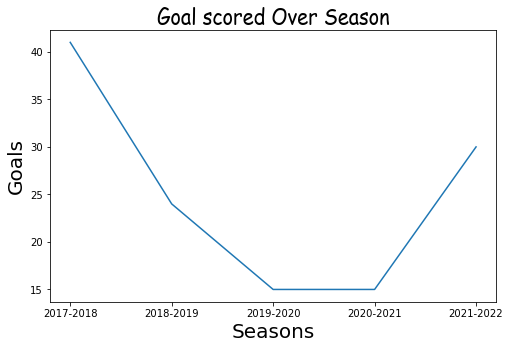

In [44]:
#plt line graph with goal scored

x= pastS['SEASON']
y= pastS['scored']


plt.figure(figsize=(8,5))
plt.plot(x,y)


plt.title('Goal scored Over Season', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

plt.xlabel('Seasons',fontdict={'fontsize':20})
plt.ylabel('Goals',fontdict={'fontsize':20})





plt.show()
